In [ ]:
import torch

In [ ]:
if torch.cuda.is_available():
    # Shows the nVidia GPUs, if this system has any
    !nvidia-smi

Thu Mar  6 04:59:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

  Using cached diffusers-0.11.1-py3-none-any.whl.metadata (29 kB)
Using cached diffusers-0.11.1-py3-none-any.whl (524 kB)
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.31.0
    Uninstalling diffusers-0.31.0:
      Successfully uninstalled diffusers-0.31.0


In [ ]:
!pip install --upgrade huggingface-hub==0.26.2 transformers==4.46.1 tokenizers==0.20.1 diffusers==0.31.0

  Using cached diffusers-0.31.0-py3-none-any.whl.metadata (18 kB)
Using cached diffusers-0.31.0-py3-none-any.whl (2.9 MB)
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.11.1
    Uninstalling diffusers-0.11.1:
      Successfully uninstalled diffusers-0.11.1


In [ ]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
if torch.cuda.is_available():
    device=torch.device("cuda")
elif torch.backends.mps.is_available():
    device=torch.device("mps")

pipe = pipe.to(device)

  0%|          | 0/50 [00:00<?, ?it/s]

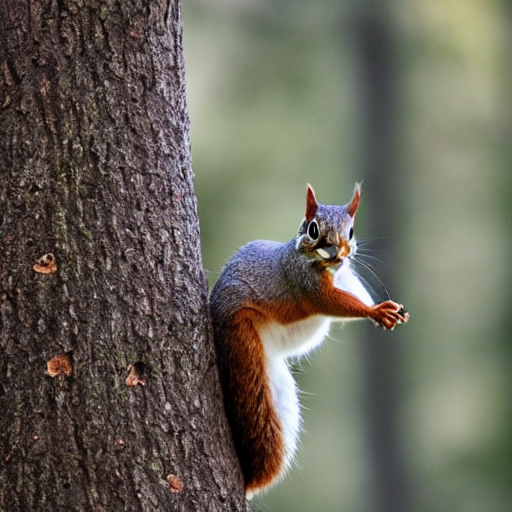

In [ ]:
prompt = "a squirrel running on trees"
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can either save it such as:
image.save(f"astronaut_rides_horse.png")

# or if you're in a google colab you can directly display it with
image